In [1]:
!pip install prophet

In [2]:
!pip install numpy

In [3]:
#import the needed code modules
#Pandas- basic for JN/JL/COLAB
import pandas as pd
#MatPlotlib- to assist with cultivating plots of data
import matplotlib.pyplot as plt
#NumPy- to access the library for mean() and other mathematical commands
import numpy as np
#Prophet- to predict future data in specific dataframes/data collections
from prophet import Prophet


In [4]:
#Read the CSV files into the program/cells.
##Everything present in this cell is filler as of now, it should be fixed when
##utilizing this cell with the propeer CSV file information.
data_x = pd.read_csv("files/congress-trading-all.csv")

#Produce Dataframes for the CSV files
x_df = pd.DataFrame(data_x)

#Display the DataFrames. . . 
display(x_df.head())


,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,BioGuideID,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
0,GLW,ST,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,-1.054504,Georgia,2024-07-25
1,ABCB,ST,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",NEW,STIFEL,NaN,Earl Leroy Carter,C001103,2024-07-24,R,GA01,House,NaN,2024-07-25,2.772833,Georgia,2024-07-25
2,UPS,ST,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.592441,Georgia,2024-07-25
3,DUK,ST,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.541266,Georgia,2024-07-25
4,JPM,ST,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.599848,Georgia,2024-07-25


In [5]:
x_df_clean = x_df[['Name','Party', 'Company','Traded', 'Transaction', 'Trade_Size_USD', 'excess_return']]
display(x_df_clean.head())
display(x_df_clean.tail())

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
0,Marjorie Taylor Mrs Greene,R,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",-1.054504
1,Earl Leroy Carter,R,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",2.772833
2,Marjorie Taylor Mrs Greene,R,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",2.592441
3,Marjorie Taylor Mrs Greene,R,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",2.541266
4,Marjorie Taylor Mrs Greene,R,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",2.599848


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
47266,Ms. Tammy Duckworth,D,"CATERPILLAR, INC.",2012-07-26,Purchase,"$1,001 - $15,000",19.001886
47267,Ms. Tammy Duckworth,D,PROCTER & GAMBLE COMPANY,2012-07-24,Sale,"$1,001 - $15,000",-143.881120
47268,Mr. Alan S. Lowenthal,D,KANSAS CITY SOUTHERN,2012-06-06,Purchase,"$1,001 - $15,000",89.238230
47269,Mr. Alan S. Lowenthal,D,EL PASO CORPORATION PREFERRED STOCK,2012-03-20,Sale,"$1,001 - $15,000",NaN
47270,Mr. Alan S. Lowenthal,D,EL PASO CORPORATION PREFERRED STOCK,2012-02-27,Sale,"$1,001 - $15,000",NaN


In [6]:
x_df_clean['Traded'] = pd.to_datetime(x_df_clean['Traded'])

/var/folders/24/dm8qthbj15d35lycw6ll_l7h0000gn/T/ipykernel_63321/1089642879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_clean['Traded'] = pd.to_datetime(x_df_clean['Traded'])


In [7]:
for column in x_df_clean.columns:
    print(x_df_clean['Name'].value_counts())

Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick T. Mchenry         1
Casey, Robert P. Jr.       1
Name: count, Length: 346, dtype: int64
Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick T. Mchenry         1
Casey, Robert P. Jr.       1
Name: count, Length: 346, dtype: int64
Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick 

In [8]:
x_df_clean['Name'].unique()

array(['Marjorie Taylor Mrs Greene', 'Earl Leroy Carter',
       'Robert E. Latta', 'Kathy Castor', 'Rudy Yakym Iii',
       'Boozman, John', 'Rick Larsen', 'Jamie Raskin',
       'Gerald E. Connolly', 'Nancy Pelosi', 'Mark Dr Green',
       'Josh Gottheimer', 'Victoria Spartz', 'Kevin Hern',
       'Morgan Mcgarvey', 'Earl Blumenauer', 'Whitehouse, Sheldon',
       'Capito, Shelley Moore', 'Max Miller', 'Mullin, Markwayne',
       'Lloyd Doggett', 'Debbie Dingell', 'Richard W. Allen',
       'Kathy Manning', 'Thomas H. Kean Jr.', 'Pete Sessions',
       'Abigail Spanberger', 'McConnell, A. Mitchell Jr.',
       'Hickenlooper, John', 'Carper, Thomas R.', 'Stephen F. Lynch',
       'Virginia Foxx', 'Chip Roy', 'William R. Keating',
       'Debbie Wasserman Schultz', 'Peters, Gary', 'Mikie Sherrill',
       'Tuberville, Tommy', 'Susie Lee', 'Carol Devine Miller',
       'C. Scott Franklin', 'Maria Elvira Salazar', 'Jonathan Jackson',
       'Deborah Ross', 'Cruz, Ted', 'Mike Kelly', 'Dan

In [9]:
x_df_clean['Name_Party'] = x_df_clean['Name'] + ' (' + x_df_clean['Party'] + ')'
x_df_clean2 = x_df_clean[['Name_Party', 'Company','Traded', 'Transaction', 'Trade_Size_USD', 'excess_return']]
x_df_clean2.head()

/var/folders/24/dm8qthbj15d35lycw6ll_l7h0000gn/T/ipykernel_63321/1642867295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_clean['Name_Party'] = x_df_clean['Name'] + ' (' + x_df_clean['Party'] + ')'


,Name_Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
0,Marjorie Taylor Mrs Greene (R),CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",-1.054504
1,Earl Leroy Carter (R),AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",2.772833
2,Marjorie Taylor Mrs Greene (R),"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",2.592441
3,Marjorie Taylor Mrs Greene (R),DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",2.541266
4,Marjorie Taylor Mrs Greene (R),JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",2.599848


In [10]:
for column in x_df_clean2.columns:
    print(x_df_clean2['Name_Party'].value_counts())

Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          1331
                            ... 
Thune, John (R)                1
Mr. Paul Ryan (R)              1
Russ Fulcher (R)               1
Patrick T. Mchenry (R)         1
Casey, Robert P. Jr. (D)       1
Name: count, Length: 346, dtype: int64
Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          1331
                            ... 
Thune, John (R)                1
Mr. Paul Ryan (R)              1
Russ Fulcher (R)               1
Patrick T. Mchenry (R)         1
Casey, Robert P. Jr. (D)       1
Name: count, Length: 346, dtype: int64
Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          133

In [11]:
top_subjects = x_df_clean2['Name_Party'].value_counts().head(6)
top_subjects

Name_Party
Josh Gottheimer (D)     2786
Thomas Macarthur (R)    2758
Perdue, David (R)       2242
Lois Frankel (D)        1358
Greg Gianforte (R)      1331
Susie Lee (D)           1262
Name: count, dtype: int64

In [12]:
df_josh = x_df_clean[x_df_clean['Name_Party'] == 'Josh Gottheimer (D)']
df_thomas = x_df_clean[x_df_clean['Name_Party'] == 'Thomas Macarthur (R)']
df_perdue = x_df_clean[x_df_clean['Name_Party'] == 'Perdue, David (R)']
df_lois = x_df_clean[x_df_clean['Name_Party'] == 'Lois Frankel (D)']
df_greg = x_df_clean[x_df_clean['Name_Party'] == 'Greg Gianforte (R)']
df_susie = x_df_clean[x_df_clean['Name_Party'] == 'Susie Lee (D)']

top6_df = pd.concat([
    df_josh,
    df_thomas,
    df_perdue,
    df_lois,
    df_greg,
    df_susie
], ignore_index=True)
top6_df

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
0,Josh Gottheimer,D,MARRIOTT INTERNATIONAL - CLASS A COMMON STOCK,2024-06-28,Sale,"$1,001 - $15,000",-2.178386,Josh Gottheimer (D)
1,Josh Gottheimer,D,APPLE INC. - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",3.444960,Josh Gottheimer (D)
2,Josh Gottheimer,D,NVIDIA CORPORATION - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",-8.523072,Josh Gottheimer (D)
3,Josh Gottheimer,D,MICROSOFT CORPORATION - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",-4.890644,Josh Gottheimer (D)
4,Josh Gottheimer,D,"LOWE'S COMPANIES, INC. COMMON STOCK",2024-06-28,Sale,"$1,001 - $15,000",8.310732,Josh Gottheimer (D)
...,...,...,...,...,...,...,...,...
11732,Susie Lee,D,DELL TECHNOLOGIES INC. CLASS C,2019-01-14,Purchase,"$1,001 - $15,000",53.842616,Susie Lee (D)
11733,Susie Lee,D,BP P.L.C.,2019-01-11,Sale,"$15,001 - $50,000",-119.936903,Susie Lee (D)
11734,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
11735,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)


In [13]:
top6_fil = top6_df[(top6_df['Traded'] >= '2019-01-01') & (top6_df['Traded'] <= '2021-12-31')]
top6_fil

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
1265,Josh Gottheimer,D,"META PLATFORMS, INC. - CLASS A",2021-12-29,Sale,"$1,001 - $15,000",-28.761068,Josh Gottheimer (D)
1266,Josh Gottheimer,D,PING AN INSURANCE,2021-12-28,Sale,"$1,001 - $15,000",-53.924235,Josh Gottheimer (D)
1267,Josh Gottheimer,D,"AFFIRM HOLDINGS, INC. - CLASS A",2021-12-28,Sale,"$1,001 - $15,000",-87.476874,Josh Gottheimer (D)
1268,Josh Gottheimer,D,TENCENT HOLDINGS LIMITED UNSPONSORED ADR REPRE...,2021-12-28,Sale,"$1,001 - $15,000",-35.958034,Josh Gottheimer (D)
1269,Josh Gottheimer,D,XP INC. - CLASS A,2021-12-22,Purchase,"$1,001 - $15,000",-56.297544,Josh Gottheimer (D)
...,...,...,...,...,...,...,...,...
11732,Susie Lee,D,DELL TECHNOLOGIES INC. CLASS C,2019-01-14,Purchase,"$1,001 - $15,000",53.842616,Susie Lee (D)
11733,Susie Lee,D,BP P.L.C.,2019-01-11,Sale,"$15,001 - $50,000",-119.936903,Susie Lee (D)
11734,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
11735,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)


In [14]:
josh_fil = top6_fil[top6_fil['Name_Party'] == 'Josh Gottheimer (D)']
thomas_fil = top6_fil[top6_fil['Name_Party'] == 'Thomas Macarthur (R)']
perdue_fil = top6_fil[top6_fil['Name_Party'] == 'Perdue, David (R)']
lois_fil = top6_fil[top6_fil['Name_Party'] == 'Lois Frankel (D)']
greg_fil = top6_fil[top6_fil['Name_Party'] == 'Greg Gianforte (R)']
susie_fil = top6_fil[top6_fil['Name_Party'] == 'Susie Lee (D)']

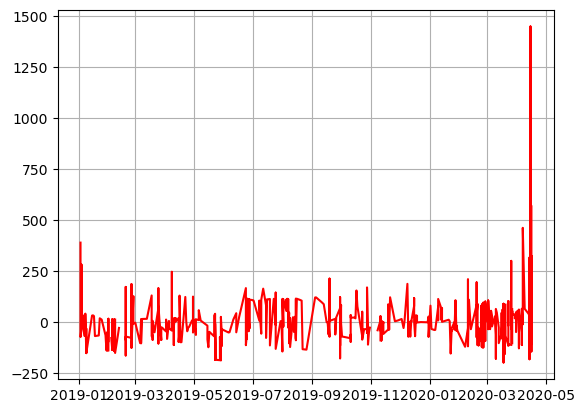

<Figure size 1200x2000 with 0 Axes>

In [15]:
plt.plot(perdue_fil['Traded'], perdue_fil['excess_return'], color= 'r')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

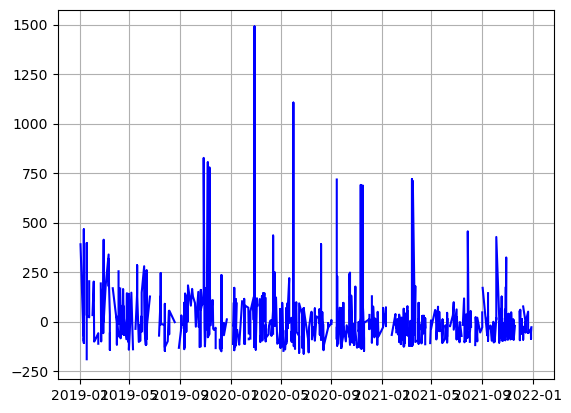

<Figure size 1200x2000 with 0 Axes>

In [16]:
plt.plot(josh_fil['Traded'], josh_fil['excess_return'], color= 'b')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

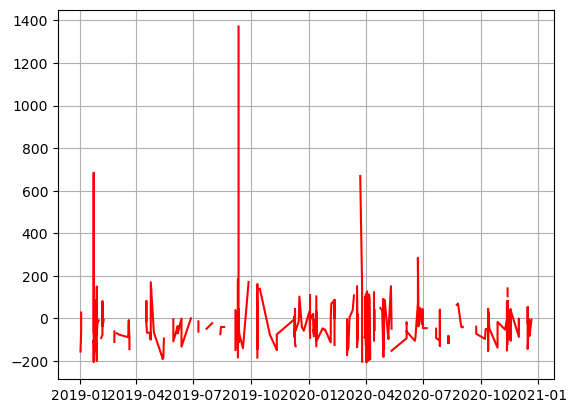

<Figure size 1200x2000 with 0 Axes>

In [17]:
plt.plot(greg_fil['Traded'], greg_fil['excess_return'], color= 'r')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

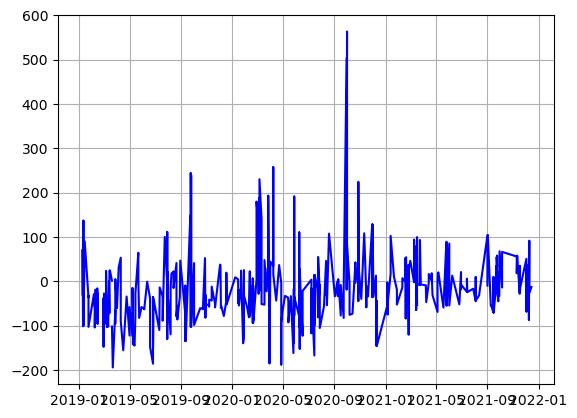

<Figure size 1200x2000 with 0 Axes>

In [18]:
plt.plot(lois_fil['Traded'], lois_fil['excess_return'], color= 'b')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

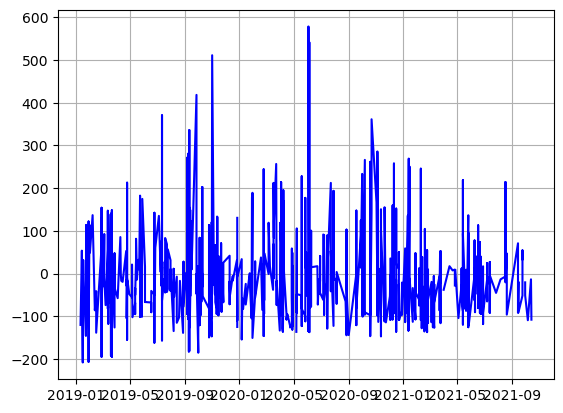

<Figure size 1200x2000 with 0 Axes>

In [19]:
plt.plot(susie_fil['Traded'], susie_fil['excess_return'], color= 'b')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

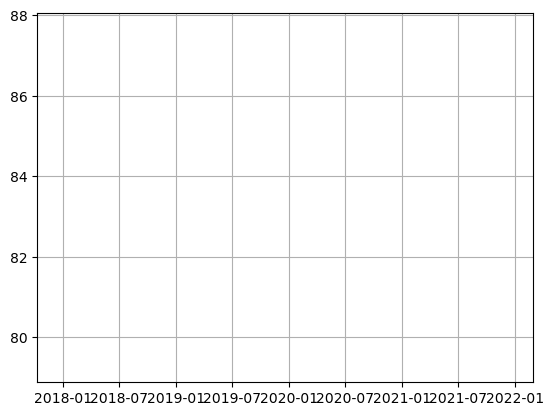

<Figure size 1200x2000 with 0 Axes>

In [20]:
plt.plot(thomas_fil['Traded'], thomas_fil['excess_return'], color= 'r')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

In [21]:
display(perdue_fil)
display(greg_fil)
display(thomas_fil)

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
5544,"Perdue, David",R,The Southern Company JR SUB NT 2015A,2020-04-16,Sale (Full),"$15,001 - $50,000",-25.492363,"Perdue, David (R)"
5545,"Perdue, David",R,Philip Morris International Inc.,2020-04-16,Sale (Full),"$1,001 - $15,000",-44.672848,"Perdue, David (R)"
5546,"Perdue, David",R,The Walt Disney Company,2020-04-16,Sale (Full),"$1,001 - $15,000",-106.888235,"Perdue, David (R)"
5547,"Perdue, David",R,"General Mills, Inc.",2020-04-16,Sale (Full),"$1,001 - $15,000",-85.760966,"Perdue, David (R)"
5548,"Perdue, David",R,ConocoPhillips,2020-04-16,Sale (Full),"$1,001 - $15,000",161.769592,"Perdue, David (R)"
...,...,...,...,...,...,...,...,...
6367,"Perdue, David",R,Devon Energy Corporation,2019-01-04,Purchase,"$15,001 - $50,000",-27.139188,"Perdue, David (R)"
6368,"Perdue, David",R,Knowles Corporation,2019-01-03,Sale (Partial),"$1,001 - $15,000",-72.944918,"Perdue, David (R)"
6369,"Perdue, David",R,"BWX Technologies, Inc.",2019-01-03,Purchase,"$1,001 - $15,000",37.345831,"Perdue, David (R)"
6370,"Perdue, David",R,"WPX Energy, Inc.",2019-01-03,Purchase,"$1,001 - $15,000",-71.215186,"Perdue, David (R)"


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
9144,Greg Gianforte,R,CHINA MOBILE LIMITED,2020-12-21,Sale,"$100,001 - $250,000",-5.532058,Greg Gianforte (R)
9145,Greg Gianforte,R,"VIASAT, INC.",2020-12-18,Purchase,"$100,001 - $250,000",-82.091119,Greg Gianforte (R)
9146,Greg Gianforte,R,ISHARES RUSSELL 2000 VALUE ETF,2020-12-18,Sale,"$250,001 - $500,000",-15.493774,Greg Gianforte (R)
9147,Greg Gianforte,R,CARDTRONICS PLC,2020-12-17,Sale,"$1,001 - $15,000",-3.601380,Greg Gianforte (R)
9148,Greg Gianforte,R,CARDTRONICS PLC,2020-12-17,Sale,"$1,001 - $15,000",-3.601380,Greg Gianforte (R)
...,...,...,...,...,...,...,...,...
9910,Greg Gianforte,R,ATLAS COPCO AB SPONSORED ADR REPSTG CLASS A,2019-01-04,Purchase,"$100,001 - $250,000",NaN,Greg Gianforte (R)
9911,Greg Gianforte,R,INFINEON TECHNOLOGIES AG,2019-01-04,Purchase,"$250,001 - $500,000",NaN,Greg Gianforte (R)
9912,Greg Gianforte,R,MULTI-COLOR CORPORATION,2019-01-03,Purchase,"$100,001 - $250,000",27.974910,Greg Gianforte (R)
9913,Greg Gianforte,R,"THERMON GROUP HOLDINGS, INC.",2019-01-03,Purchase,"$50,001 - $100,000",-60.959381,Greg Gianforte (R)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
2786,Thomas Macarthur,R,"INTERACTIVE BROKERS GROUP, INC.",2019-12-21,Purchase,"$1,001 - $15,000",83.469809,Thomas Macarthur (R)


In [22]:
display(josh_fil)
display(lois_fil)
display(susie_fil)

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
1265,Josh Gottheimer,D,"META PLATFORMS, INC. - CLASS A",2021-12-29,Sale,"$1,001 - $15,000",-28.761068,Josh Gottheimer (D)
1266,Josh Gottheimer,D,PING AN INSURANCE,2021-12-28,Sale,"$1,001 - $15,000",-53.924235,Josh Gottheimer (D)
1267,Josh Gottheimer,D,"AFFIRM HOLDINGS, INC. - CLASS A",2021-12-28,Sale,"$1,001 - $15,000",-87.476874,Josh Gottheimer (D)
1268,Josh Gottheimer,D,TENCENT HOLDINGS LIMITED UNSPONSORED ADR REPRE...,2021-12-28,Sale,"$1,001 - $15,000",-35.958034,Josh Gottheimer (D)
1269,Josh Gottheimer,D,XP INC. - CLASS A,2021-12-22,Purchase,"$1,001 - $15,000",-56.297544,Josh Gottheimer (D)
...,...,...,...,...,...,...,...,...
2439,Josh Gottheimer,D,"ALTRIA GROUP, INC.",2019-01-11,Purchase,"$1,001 - $15,000",-107.191061,Josh Gottheimer (D)
2440,Josh Gottheimer,D,"UNITED PARCEL SERVICE, INC.",2019-01-11,Purchase,"$1,001 - $15,000",-78.739873,Josh Gottheimer (D)
2441,Josh Gottheimer,D,MICROSOFT CORPORATION,2019-01-10,Sale,"$1,001 - $15,000",200.269589,Josh Gottheimer (D)
2442,Josh Gottheimer,D,NEWMARKET CORP,2019-01-10,Sale,"$1,001 - $15,000",-71.844697,Josh Gottheimer (D)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
8154,Lois Frankel,D,KIMBERLY-CLARK CORPORATION,2021-12-15,Sale,"$1,001 - $15,000",-13.078446,Lois Frankel (D)
8155,Lois Frankel,D,"ZIMMER BIOMET HOLDINGS, INC.",2021-12-10,Purchase,"$1,001 - $15,000",-26.192958,Lois Frankel (D)
8156,Lois Frankel,D,"INSPERITY, INC.",2021-12-10,Purchase,"$1,001 - $15,000",-24.838560,Lois Frankel (D)
8157,Lois Frankel,D,"BWX TECHNOLOGIES, INC.",2021-12-10,Purchase,"$1,001 - $15,000",91.686072,Lois Frankel (D)
8158,Lois Frankel,D,"EPAM SYSTEMS, INC.",2021-12-09,Sale,"$1,001 - $15,000",-86.542753,Lois Frankel (D)
...,...,...,...,...,...,...,...,...
8585,Lois Frankel,D,HUNTSMAN CORPORATION,2019-01-10,Purchase,"$1,001 - $15,000",-101.490687,Lois Frankel (D)
8586,Lois Frankel,D,"GOLDMAN SACHS GROUP, INC.",2019-01-09,Sale,"$1,001 - $15,000",71.683812,Lois Frankel (D)
8587,Lois Frankel,D,"EXPEDITORS INTERNATIONAL OF WASHINGTON, INC.",2019-01-09,Purchase,"$1,001 - $15,000",-30.264916,Lois Frankel (D)
8588,Lois Frankel,D,ROCHE HOLDINGS AG BASEL AMERICAN DEPOSITARY SH...,2019-01-09,Purchase,"$1,001 - $15,000",NaN,Lois Frankel (D)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
10557,Susie Lee,D,"RACKSPACE TECHNOLOGY, INC.",2021-10-14,Sale,"$1,001 - $15,000",-107.665899,Susie Lee (D)
10558,Susie Lee,D,HOWARD HUGHES CORPORATION,2021-10-13,Sale,"$1,001 - $15,000",-13.257321,Susie Lee (D)
10559,Susie Lee,D,"COMMSCOPE HOLDING COMPANY, INC.",2021-10-06,Sale,"$1,001 - $15,000",-108.925726,Susie Lee (D)
10560,Susie Lee,D,"ZIMMER BIOMET HOLDINGS, INC.",2021-09-30,Sale,"$15,001 - $50,000",-50.819984,Susie Lee (D)
10561,Susie Lee,D,SYNCHRONY FINANCIAL,2021-09-30,Sale,"$1,001 - $15,000",-22.971449,Susie Lee (D)
...,...,...,...,...,...,...,...,...
11732,Susie Lee,D,DELL TECHNOLOGIES INC. CLASS C,2019-01-14,Purchase,"$1,001 - $15,000",53.842616,Susie Lee (D)
11733,Susie Lee,D,BP P.L.C.,2019-01-11,Sale,"$15,001 - $50,000",-119.936903,Susie Lee (D)
11734,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
11735,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)


In [23]:
df_thomas

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
21206,Thomas Macarthur,R,"INTERACTIVE BROKERS GROUP, INC.",2019-12-21,Purchase,"$1,001 - $15,000",83.469809,Thomas Macarthur (R)
26980,Thomas Macarthur,R,PHILIP MORRIS INTERNATIONAL INC,2018-12-31,Sale,"$1,001 - $15,000",-47.912357,Thomas Macarthur (R)
26990,Thomas Macarthur,R,NXP SEMICONDUCTORS N.V.,2018-12-31,Purchase,"$15,001 - $50,000",128.382528,Thomas Macarthur (R)
26997,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.909767,Thomas Macarthur (R)
26999,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.909767,Thomas Macarthur (R)
...,...,...,...,...,...,...,...,...
43714,Thomas Macarthur,R,MICROSOFT CORPORATION,2015-01-09,Purchase,"$1,001 - $15,000",633.959218,Thomas Macarthur (R)
43734,Thomas Macarthur,R,SYNGENTA AG,2015-01-06,Purchase,"$1,001 - $15,000",-270.074051,Thomas Macarthur (R)
43736,Thomas Macarthur,R,TEVA PHARMACEUTICAL INDUSTRIES LIMITED AMERICA...,2015-01-06,Purchase,"$1,001 - $15,000",-241.871053,Thomas Macarthur (R)
43739,Thomas Macarthur,R,KLX INC.,2015-01-06,Sale,"$1,001 - $15,000",10.043209,Thomas Macarthur (R)


In [24]:
display(perdue_fil['Company'].count())
display(perdue_fil['Company'].value_counts().head(1))
display(greg_fil['Company'].count())
display(greg_fil['Company'].value_counts().head(1))
display(thomas_fil['Company'].count())
display(thomas_fil['Company'].value_counts().head(1))

828

Company
Caesars Entertainment Corporation    33
Name: count, dtype: int64

771

Company
AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SERVICES INC    15
Name: count, dtype: int64

1

Company
INTERACTIVE BROKERS GROUP, INC.    1
Name: count, dtype: int64

**Most Common Company of Stocks Purchased from 2019-2021-- Republicans**

*Perdue- Caesar's Entertainment Corporation- 33 Total*

*Greg- AMN Healthcare Services Inc.- 15 Total*

*Thomas- Interactive Brokers Group, Inc.- 1 Total*


In [25]:
display(josh_fil['Company'].count())
display(josh_fil['Company'].value_counts().head(1))
display(lois_fil['Company'].count())
display(lois_fil['Company'].value_counts().head(1))
display(susie_fil['Company'].count())
display(susie_fil['Company'].value_counts().head(1))

1179

Company
MICROSOFT CORPORATION    156
Name: count, dtype: int64

436

Company
DUPONT DE NEMOURS, INC.    10
Name: count, dtype: int64

1180

Company
BALL CORPORATION    21
Name: count, dtype: int64

**Most Common Company of Stocks Purchased from 2019-2021-- Democrats**

*Josh- Microsoft Corporation- 156 Total*

*Lois- Dupont De Nemours, Inc. - 10 Total*

*Susie- Ball Corporation - 21 Total*

**Average Excess Return from Priorly Determined Companies from 2019-2021--Republicans**

In [26]:
perdue__comp = perdue_fil[perdue_fil['Company'] == 'Caesars Entertainment Corporation']
cec_avg =perdue__comp['excess_return'].mean()
print(f"The average excess return for Perdue from Caesars Entertainment Corp is {cec_avg} from 2019-2021.")


The average excess return for Perdue from Caesars Entertainment Corp is 109.63409926495764 from 2019-2021.


In [27]:
greg__comp = greg_fil[greg_fil['Company'] == 'AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SERVICES INC']
amn_avg =greg__comp['excess_return'].mean()
amn_avg
print(f"The average excess return for Greg from AMN Healthcare Services is {amn_avg} from 2019-2021.")

The average excess return for Greg from AMN Healthcare Services is -48.21769729854893 from 2019-2021.


In [28]:
thomas__comp = thomas_fil[thomas_fil['Company'] == 'INTERACTIVE BROKERS GROUP, INC.']
ibg_avg =thomas__comp['excess_return'].mean()
ibg_avg
print(f"The average excess return for Thomas from Interactive Brokers Group is {ibg_avg} from 2019-2021.")

The average excess return for Thomas from Interactive Brokers Group is 83.4698092311784 from 2019-2021.


In [29]:
repub_covid = {"Republican": ['Perdue', 'Greg', 'Thomas'],
               "Average Excess Return Covid": [cec_avg, amn_avg, ibg_avg]}

repub_covid_df = pd.DataFrame(repub_covid)
repub_covid_df

,Republican,Average Excess Return Covid
0,Perdue,109.634099
1,Greg,-48.217697
2,Thomas,83.469809


Text(0.5, 1.0, 'Covid Years Average Excess Return--Most Traded Companies')

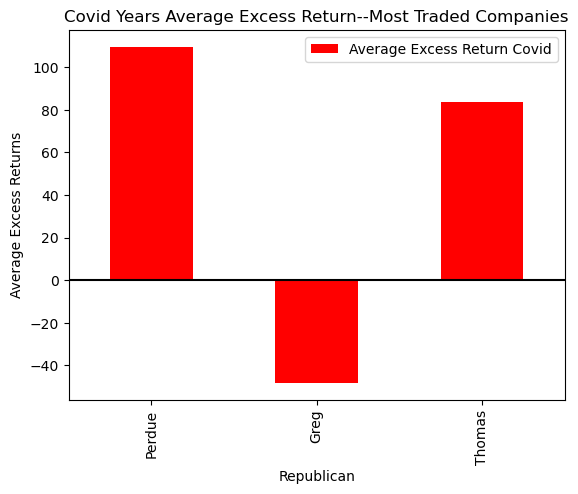

In [30]:
repub_covid_df.plot.bar(x='Republican', y="Average Excess Return Covid", color="r")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Covid Years Average Excess Return--Most Traded Companies')

**Average Excess Return for Prior Mentioned Companies from 2019-2021--Democrats**

In [31]:
josh__comp = josh_fil[josh_fil['Company'] == 'MICROSOFT CORPORATION']
mc_avg =josh__comp['excess_return'].mean()
mc_avg
print(f"The average excess return for Josh from Microsoft Corporation is {mc_avg} from 2019-2021.")

The average excess return for Josh from Microsoft Corporation is 84.83678517932668 from 2019-2021.


In [32]:
lois__comp = lois_fil[lois_fil['Company'] == 'DUPONT DE NEMOURS, INC.']
ddn_avg =lois__comp['excess_return'].mean()
ddn_avg
print(f"The average excess return for Lois from Dupont De Nemours, Inc. is {ddn_avg} from 2019-2021.")

The average excess return for Lois from Dupont De Nemours, Inc. is -27.14873487532207 from 2019-2021.


In [33]:
susie__comp = susie_fil[susie_fil['Company'] == 'BALL CORPORATION']
bc_avg =susie__comp['excess_return'].mean()
bc_avg
print(f"The average excess return for Susie from Ball Corporation is {bc_avg} from 2019-2021.")

The average excess return for Susie from Ball Corporation is -23.38496543229395 from 2019-2021.


In [34]:
democrat_covid = {"Democrat": ['Josh', 'Lois', 'Susie'],
               "Average Excess Return Covid": [mc_avg, ddn_avg, bc_avg]}

democrat_covid_df = pd.DataFrame(democrat_covid)
democrat_covid_df

,Democrat,Average Excess Return Covid
0,Josh,84.836785
1,Lois,-27.148735
2,Susie,-23.384965


Text(0.5, 1.0, 'Covid Years Average Excess Return--Most Traded Companies')

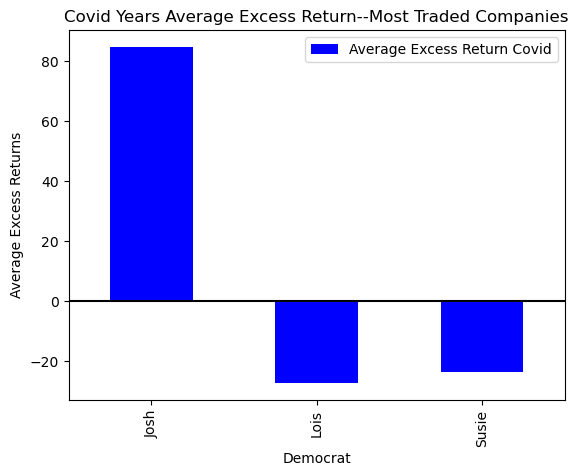

In [35]:
democrat_covid_df.plot.bar(x='Democrat', y="Average Excess Return Covid", color="b")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Covid Years Average Excess Return--Most Traded Companies')

#### Average Excess Returns in 2019-2021 (all companies accounted for)

In [36]:
perdue_exc_avg = perdue_fil['excess_return'].mean()
greg_exc_avg = greg_fil['excess_return'].mean()
thomas_exc_avg = thomas_fil['excess_return'].mean()

rep_exc_avg = {'Republican': ['Perdue', 'Greg', 'Thomas'],
               'Excess Return Average': [perdue_exc_avg, greg_exc_avg, thomas_exc_avg]}

rep_excavg_df = pd.DataFrame(rep_exc_avg)
rep_excavg_df

,Republican,Excess Return Average
0,Perdue,-6.713527
1,Greg,-27.052938
2,Thomas,83.469809


Text(0.5, 1.0, 'Republican Average Excess Returns--Covid Years')

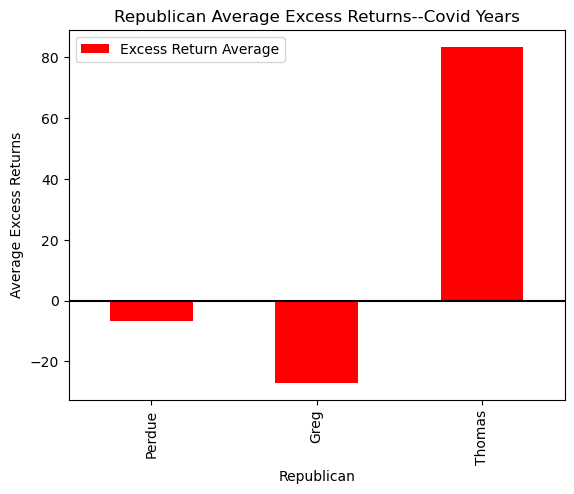

In [37]:
rep_excavg_df.plot.bar(x='Republican', y="Excess Return Average", color="r")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Republican Average Excess Returns--Covid Years')

In [38]:
josh_exc_avg = josh_fil['excess_return'].mean()
lois_exc_avg = lois_fil['excess_return'].mean()
susie_exc_avg = susie_fil['excess_return'].mean()

dem_exc_avg = {'Democrat': ['Josh', 'Lois', 'Susie'],
               'Excess Return Average': [josh_exc_avg, lois_exc_avg, susie_exc_avg]}

dem_excavg_df = pd.DataFrame(dem_exc_avg)
dem_excavg_df

,Democrat,Excess Return Average
0,Josh,5.753123
1,Lois,-19.434593
2,Susie,-17.220559


Text(0.5, 1.0, 'Democrat Average Excess Returns--Covid Years')

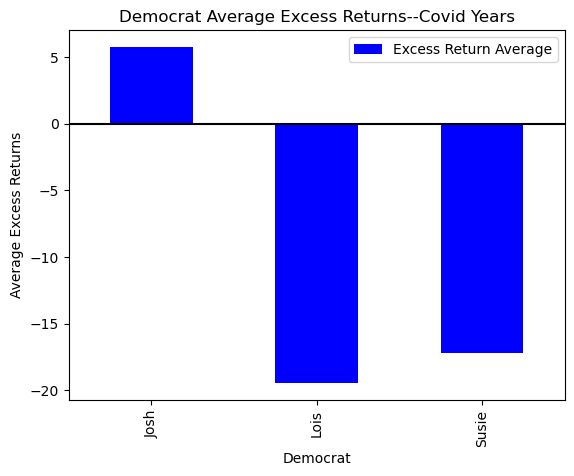

In [48]:
dem_excavg_df.plot.bar(x='Democrat', y="Excess Return Average", color="b")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Democrat Average Excess Returns--Covid Years')

In [59]:
josh_fil_pro = josh_fil[['Traded', 'excess_return']]
josh_fil_pro = josh_fil_pro.sort_values(by='Traded', ascending=True).reset_index(drop=True)
josh_fil_pro= josh_fil_pro.rename(columns={'Traded' : 'ds', 'excess_return' : 'y'})
#due to certain dates appearing multiple times, aggregation was necessitated for duplicate dates
#in this case 'sum' is used.
jfp = josh_fil_pro.groupby('ds').agg({'y': 'sum'}).reset_index()   # Sum
display(jfp.head())
display(jfp.tail())


,ds,y
0,2019-01-03,390.287275
1,2019-01-10,128.424892
2,2019-01-11,-499.864919
3,2019-01-15,0.000000
4,2019-01-18,1194.220698


,ds,y
369,2021-12-15,-115.276357
370,2021-12-21,41.707964
371,2021-12-22,-56.297544
372,2021-12-28,-177.359143
373,2021-12-29,-28.761068


11:22:52 - cmdstanpy - INFO - Chain [1] start processing
11:22:52 - cmdstanpy - INFO - Chain [1] done processing


,ds
1464,2024-12-24
1465,2024-12-25
1466,2024-12-26
1467,2024-12-27
1468,2024-12-28


,ds,yhat,yhat_upper,yhat_lower
1464,2024-12-24,-296.932208,25.012283,-620.923487
1465,2024-12-25,-316.752573,-4.176042,-663.753915
1466,2024-12-26,-285.569505,38.926759,-600.531230
1467,2024-12-27,-340.881367,-25.248149,-664.653246
1468,2024-12-28,-143.967739,169.167615,-475.565847


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


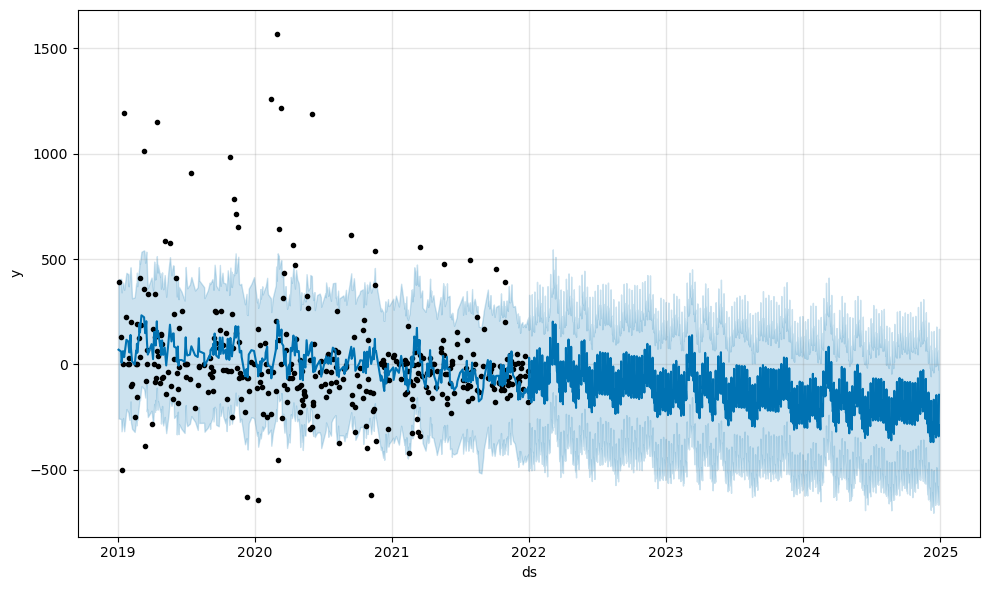

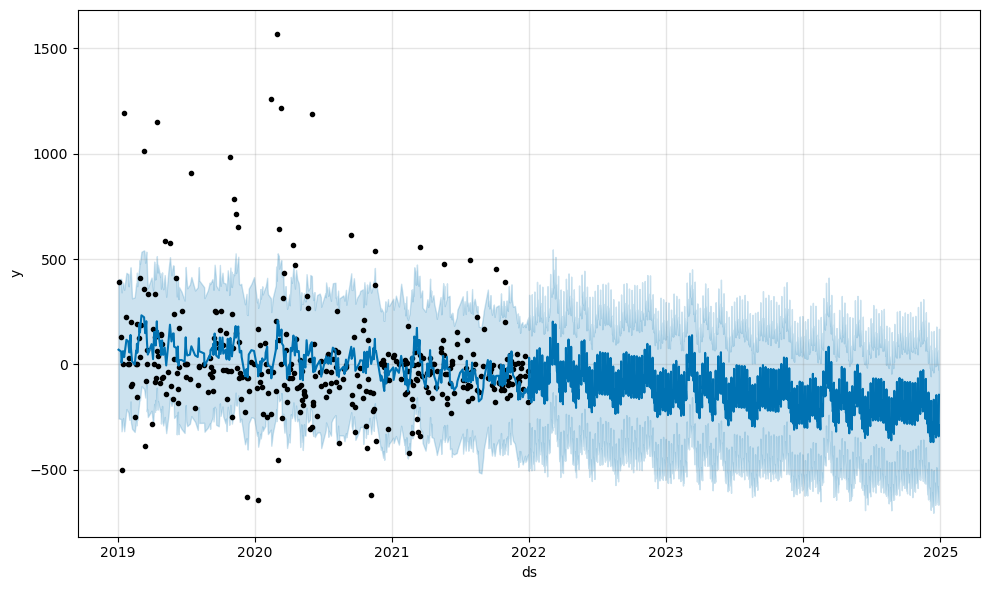

In [71]:
jfp_model = Prophet()
jfp_model
jfp_model.fit(jfp)
future_jfp = jfp_model.make_future_dataframe(periods=1095, freq='D')
display(future_jfp.tail())
forecast_jfp = jfp_model.predict(future_jfp)
forecast_jfp = forecast_jfp[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
display(forecast_jfp.tail())
jfp_model.plot(forecast_jfp)

In [68]:
thomas_fil_pro = thomas_fil[['Traded', 'excess_return']]
thomas_fil_pro = thomas_fil_pro.sort_values(by='Traded', ascending=True).reset_index(drop=True)
thomas_fil_pro= thomas_fil_pro.rename(columns={'Traded' : 'ds', 'excess_return' : 'y'})
#due to certain dates appearing multiple times, aggregation was necessitated for duplicate dates
#in this case 'sum' is used.
tfp = thomas_fil_pro.groupby('ds').agg({'y': 'sum'}).reset_index()   # Sum
display(tfp.head())
display(tfp.tail())

tfp_model = Prophet()
tfp_model
tfp_model.fit(tfp)
future_tfp = tfp_model.make_future_dataframe(periods=1095, freq='D')
display(future_tfp.tail())
forecast_tfp = tfp_model.predict(future_tfp)
forecast_tfp = forecast_tfp[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
display(forecast_tfp.tail())
tfp_model.plot(forecast_tfp)

# Prophet for Thomas does not work, this is because he only had one trade in the year of 2019
# as that is when he left office.



,ds,y
0,2019-12-21,83.469809


,ds,y
0,2019-12-21,83.469809


ValueError: Dataframe has less than 2 non-NaN rows.

,ds,y
0,2019-01-03,283.473001
1,2019-01-04,323.970682
2,2019-01-07,-31.579207
3,2019-01-08,8.903405
4,2019-01-09,-367.213249


,ds,y
218,2020-04-09,65.701594
219,2020-04-13,41.315021
220,2020-04-14,-1047.444153
221,2020-04-15,2079.775251
222,2020-04-16,-131.425874


11:23:21 - cmdstanpy - INFO - Chain [1] start processing
11:23:21 - cmdstanpy - INFO - Chain [1] done processing


,ds
1313,2023-04-12
1314,2023-04-13
1315,2023-04-14
1316,2023-04-15
1317,2023-04-16


,ds,yhat,yhat_upper,yhat_lower
1313,2023-04-12,185.698046,516.347026,-123.637240
1314,2023-04-13,131.220949,424.815305,-167.842213
1315,2023-04-14,142.003995,428.005352,-163.101918
1316,2023-04-15,351.730010,628.953114,59.541657
1317,2023-04-16,351.864491,636.119447,64.089929


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


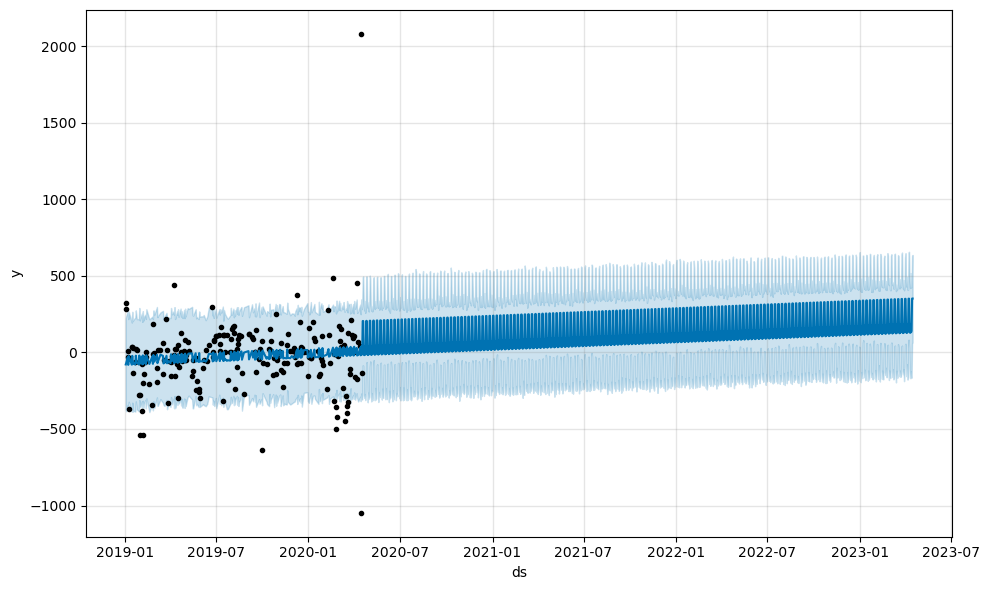

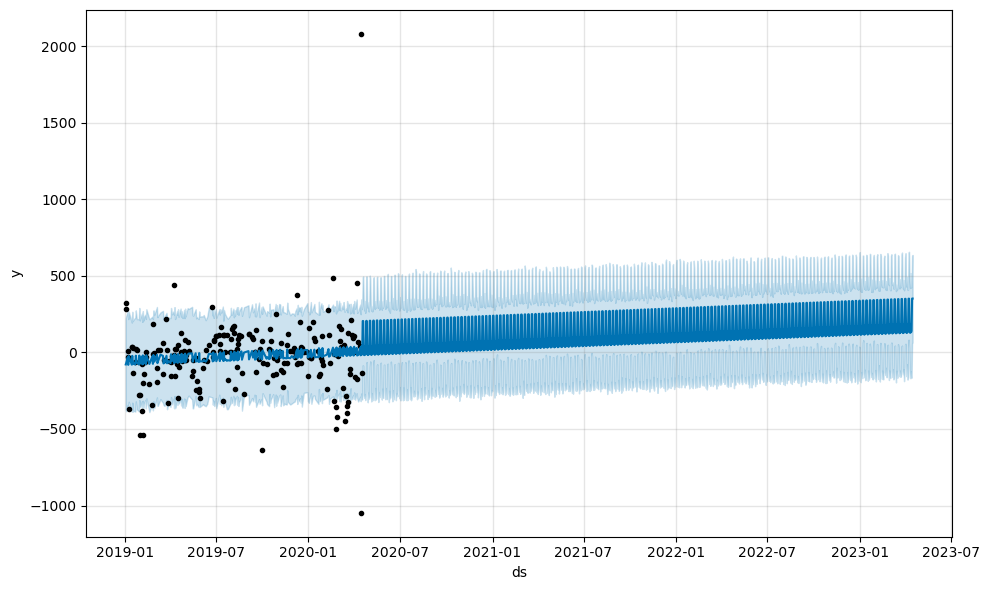

In [72]:
perdue_fil_pro = perdue_fil[['Traded', 'excess_return']]
perdue_fil_pro = perdue_fil_pro.sort_values(by='Traded', ascending=True).reset_index(drop=True)
perdue_fil_pro= perdue_fil_pro.rename(columns={'Traded' : 'ds', 'excess_return' : 'y'})
#due to certain dates appearing multiple times, aggregation was necessitated for duplicate dates
#in this case 'sum' is used.
pfp = perdue_fil_pro.groupby('ds').agg({'y': 'sum'}).reset_index()   # Sum
display(pfp.head())
display(pfp.tail())

pfp_model = Prophet()
pfp_model
pfp_model.fit(pfp)
future_pfp = pfp_model.make_future_dataframe(periods=1095, freq='D')
display(future_pfp.tail())
forecast_pfp = pfp_model.predict(future_pfp)
forecast_pfp = forecast_pfp[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
display(forecast_pfp.tail())
pfp_model.plot(forecast_pfp)




,ds,y
0,2019-01-04,-9.748208
1,2019-01-09,41.418896
2,2019-01-10,-101.490687
3,2019-01-11,37.232809
4,2019-01-14,89.894823


,ds,y
220,2021-12-05,-67.350558
221,2021-12-08,-55.317904
222,2021-12-09,-188.709316
223,2021-12-10,40.654555
224,2021-12-15,-13.078446


11:23:22 - cmdstanpy - INFO - Chain [1] start processing
11:23:22 - cmdstanpy - INFO - Chain [1] done processing


,ds
1315,2024-12-10
1316,2024-12-11
1317,2024-12-12
1318,2024-12-13
1319,2024-12-14


,ds,yhat,yhat_upper,yhat_lower
1315,2024-12-10,91.252418,240.782308,-65.371329
1316,2024-12-11,88.229374,229.727964,-56.716801
1317,2024-12-12,80.627863,233.521015,-50.001082
1318,2024-12-13,94.937240,245.752871,-46.534863
1319,2024-12-14,139.915966,301.726789,-1.498736


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


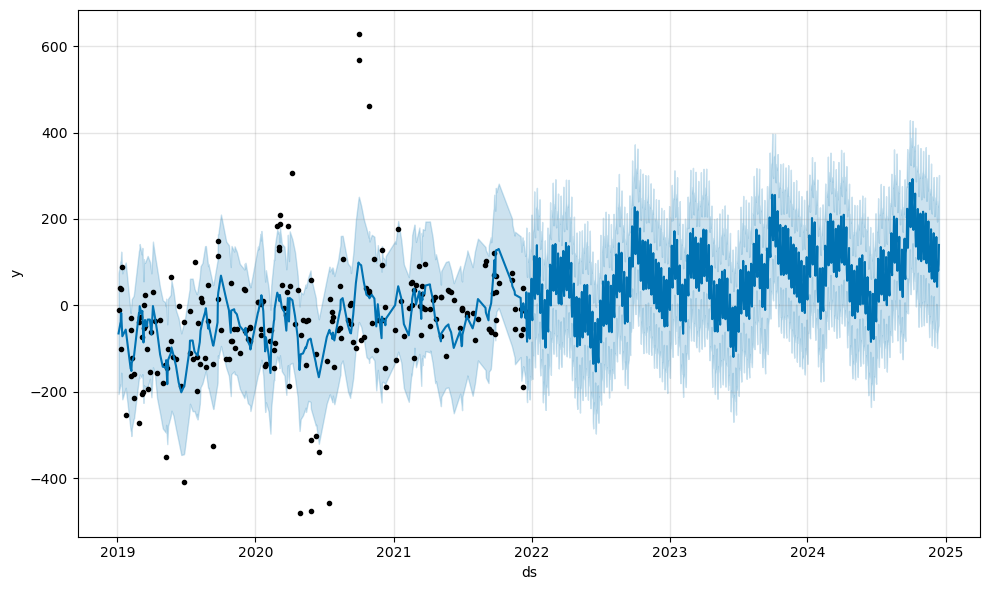

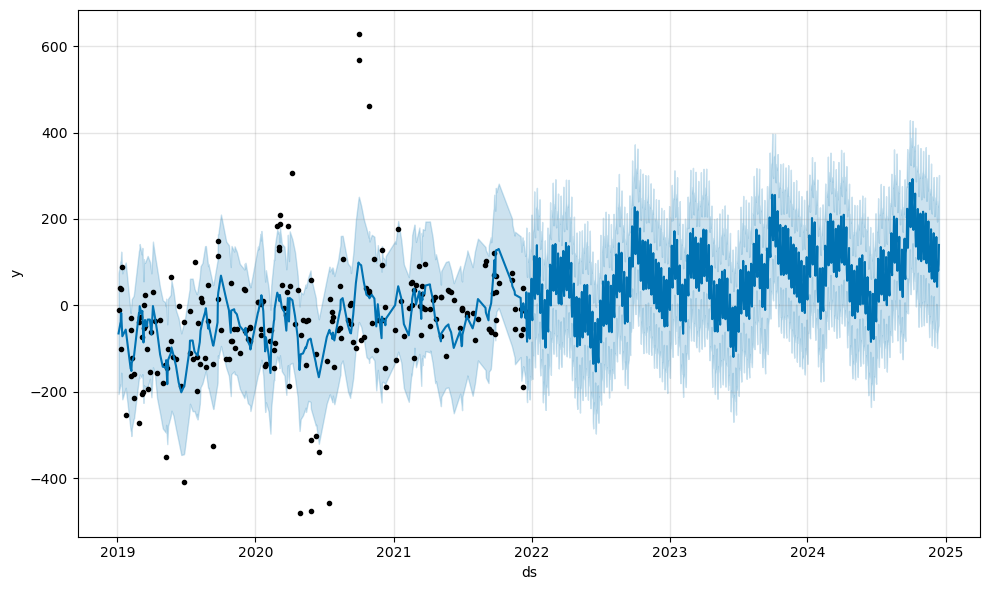

In [73]:
lois_fil_pro = lois_fil[['Traded', 'excess_return']]
lois_fil_pro = lois_fil_pro.sort_values(by='Traded', ascending=True).reset_index(drop=True)
lois_fil_pro= lois_fil_pro.rename(columns={'Traded' : 'ds', 'excess_return' : 'y'})
#due to certain dates appearing multiple times, aggregation was necessitated for duplicate dates
#in this case 'sum' is used.
lfp = lois_fil_pro.groupby('ds').agg({'y': 'sum'}).reset_index()   # Sum
display(lfp.head())
display(lfp.tail())

lfp_model = Prophet()
lfp_model
lfp_model.fit(lfp)
future_lfp = lfp_model.make_future_dataframe(periods=1095, freq='D')
display(future_lfp.tail())
forecast_lfp = lfp_model.predict(future_lfp)
forecast_lfp = forecast_lfp[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
display(forecast_lfp.tail())
lfp_model.plot(forecast_lfp)

,ds,y
0,2019-01-02,-155.26677
1,2019-01-03,-32.98447
2,2019-01-04,0.00000
3,2019-01-08,-97.55781
4,2019-01-11,-116.43786


,ds,y
157,2020-12-08,0.000000
158,2020-12-15,-78.220250
159,2020-12-17,-7.202761
160,2020-12-18,-97.584893
161,2020-12-21,-5.532058


11:24:52 - cmdstanpy - INFO - Chain [1] start processing
11:24:52 - cmdstanpy - INFO - Chain [1] done processing


,ds
1252,2023-12-17
1253,2023-12-18
1254,2023-12-19
1255,2023-12-20
1256,2023-12-21


,ds,yhat,yhat_upper,yhat_lower
1252,2023-12-17,143.984913,451.324843,-164.260954
1253,2023-12-18,111.770916,410.807917,-167.441744
1254,2023-12-19,130.264246,451.931772,-154.678048
1255,2023-12-20,158.677350,472.239975,-158.703214
1256,2023-12-21,153.267682,450.161768,-141.312608


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


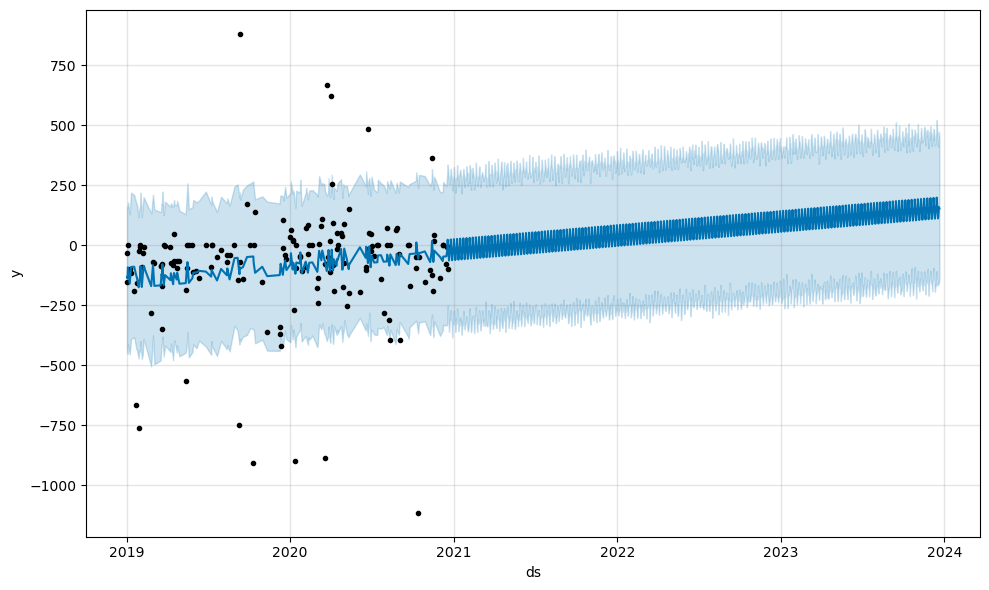

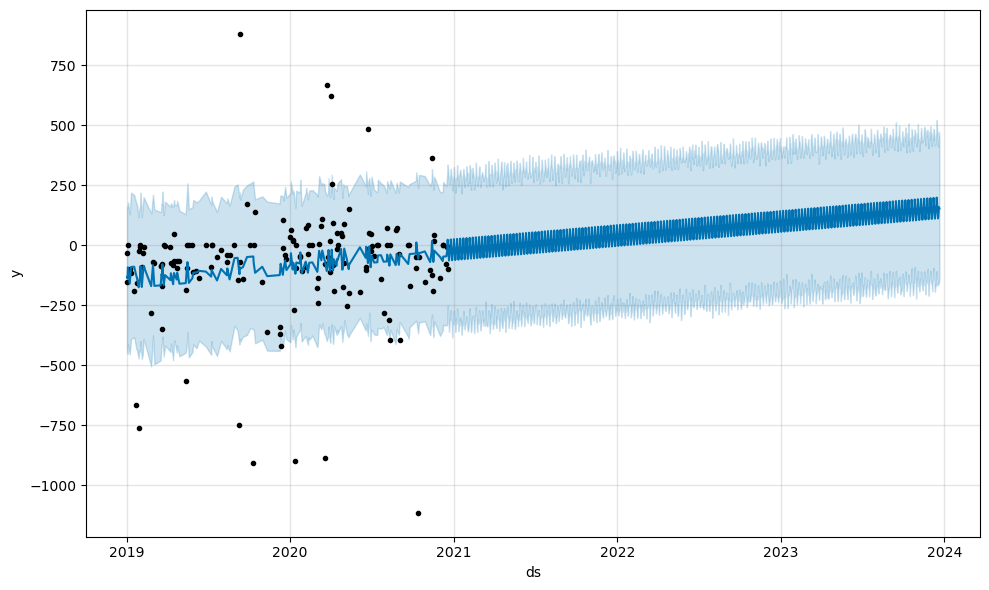

In [74]:
greg_fil_pro = greg_fil[['Traded', 'excess_return']]
greg_fil_pro = greg_fil_pro.sort_values(by='Traded', ascending=True).reset_index(drop=True)
greg_fil_pro= greg_fil_pro.rename(columns={'Traded' : 'ds', 'excess_return' : 'y'})
#due to certain dates appearing multiple times, aggregation was necessitated for duplicate dates
#in this case 'sum' is used.
gfp = greg_fil_pro.groupby('ds').agg({'y': 'sum'}).reset_index()   # Sum
display(gfp.head())
display(gfp.tail())

gfp_model = Prophet()
gfp_model
gfp_model.fit(gfp)
future_gfp = gfp_model.make_future_dataframe(periods=1095, freq='D')
display(future_gfp.tail())
forecast_gfp = gfp_model.predict(future_gfp)
forecast_gfp = forecast_gfp[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
display(forecast_gfp.tail())
gfp_model.plot(forecast_gfp)

,ds,y
0,2019-01-11,-119.936903
1,2019-01-14,53.842616
2,2019-01-16,-286.884183
3,2019-01-17,32.077814
4,2019-01-18,-13.799672


,ds,y
253,2021-09-28,0.000000
254,2021-09-30,-94.119672
255,2021-10-06,-108.925726
256,2021-10-13,-13.257321
257,2021-10-14,-107.665899


11:28:08 - cmdstanpy - INFO - Chain [1] start processing
11:28:08 - cmdstanpy - INFO - Chain [1] done processing


,ds
1348,2024-10-09
1349,2024-10-10
1350,2024-10-11
1351,2024-10-12
1352,2024-10-13


,ds,yhat,yhat_upper,yhat_lower
1348,2024-10-09,-98.834764,172.868654,-351.751512
1349,2024-10-10,-90.051217,165.057717,-362.593247
1350,2024-10-11,-53.303701,224.274315,-308.224782
1351,2024-10-12,-121.274046,133.982770,-409.211195
1352,2024-10-13,-118.096032,140.915343,-360.344100


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


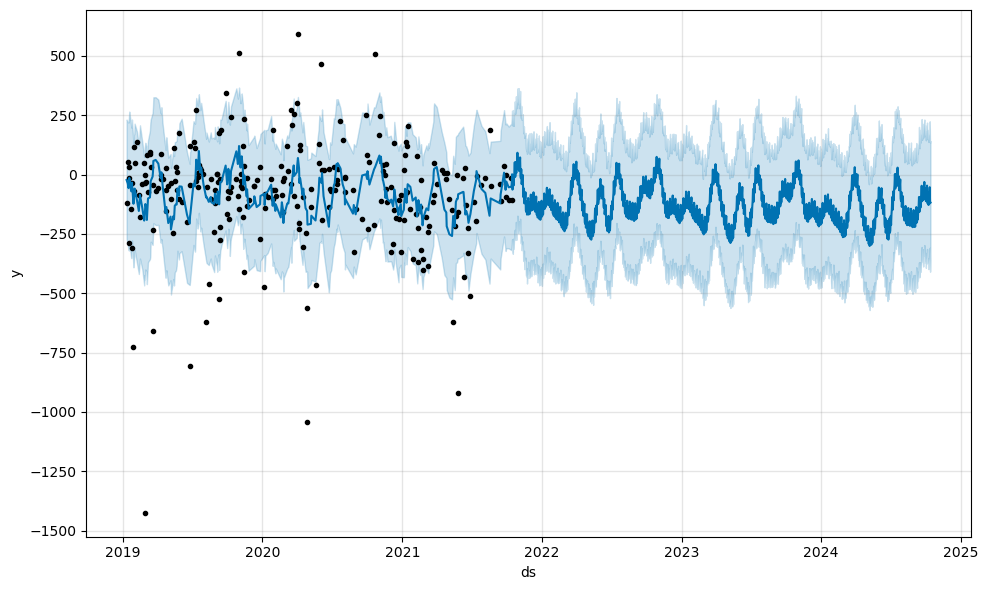

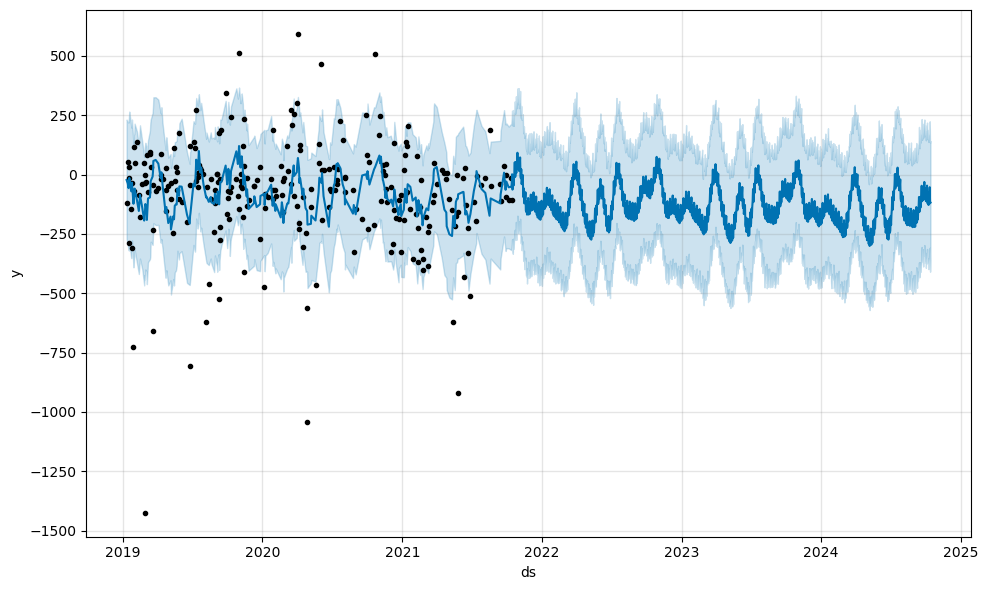

In [75]:
susie_fil_pro = susie_fil[['Traded', 'excess_return']]
susie_fil_pro = susie_fil_pro.sort_values(by='Traded', ascending=True).reset_index(drop=True)
susie_fil_pro= susie_fil_pro.rename(columns={'Traded' : 'ds', 'excess_return' : 'y'})
#due to certain dates appearing multiple times, aggregation was necessitated for duplicate dates
#in this case 'sum' is used.
sfp = susie_fil_pro.groupby('ds').agg({'y': 'sum'}).reset_index()   # Sum
display(sfp.head())
display(sfp.tail())

sfp_model = Prophet()
sfp_model
sfp_model.fit(sfp)
future_sfp = sfp_model.make_future_dataframe(periods=1095, freq='D')
display(future_sfp.tail())
forecast_sfp = sfp_model.predict(future_sfp)
forecast_sfp = forecast_sfp[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]
display(forecast_sfp.tail())
sfp_model.plot(forecast_sfp)